In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound
from timeit import default_timer as timer

# Bellman operator

In [38]:
def bellman_operator(w, grid, β, Tw=None, compute_policy=False, compute_consumption=False):
    α = 0.4
    δ = 0.04
    
    # linear approximation of w
    w_func = lambda x: np.interp(x, grid, w)
    
    if Tw is None:
        Tw = np.empty_like(w)
        
    if compute_policy:
        σ = np.empty_like(w)
    if compute_consumption:
        c = np.empty_like(w)
        
    for i, k in enumerate(grid):
        def objective(k_prime):
            return -np.log(k**α+(1-δ)*k-k_prime)-β*np.mean(w_func(k_prime))
        
        k_star = fminbound(objective, 5, k)
        c_star = k**α+(1-δ)*k-k_star
        
        if compute_policy:
            σ[i]=k_star
        if compute_consumption:
            c[i]=c_star
            
        Tw[i]=-objective(k_star)
  
    if compute_policy and compute_consumption:
        return Tw, σ, c
    elif compute_policy:
        return Tw, σ
    elif compute_consumption:
        return Tw, c
    else:
        return Tw

### Iteration

loop stopped at iteration:  218

elapsed time: 187.19240615361787


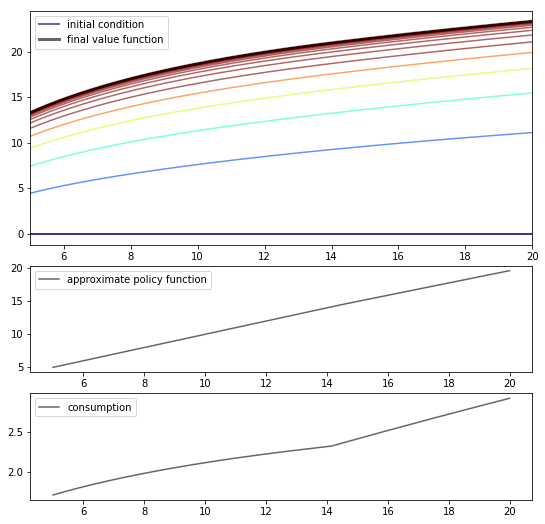

In [43]:
grid_min = 5
grid_max = 20
grid_size = 1000
max_iter = 300

grid = np.linspace(grid_min, grid_max, grid_size)

w = np.zeros(1000)
n=5

fig = plt.figure(figsize=(9,9))
size = (4,1)
ax=plt.subplot2grid(size, (0,0), rowspan=2)
ax2=plt.subplot2grid(size, (2,0))
ax3=plt.subplot2grid(size, (3,0))
ax.set_xlim(np.min(grid), np.max(grid))

# VALUE FUNCTION
lb = 'initial condition'
ax.plot(grid, w, color=plt.cm.jet(0), lw=2, alpha=0.6, label=lb)

tol=0.0001
j=0
error=1
start = timer()
while j<max_iter and error>tol:
    w_new = bellman_operator(w, grid, β=0.96)
    error = np.max(np.abs(w_new-w))
    if j%10==0:
        ax.plot(grid, w, color=plt.cm.jet(j/50), alpha=0.6)
            
    error = np.max(np.abs(w_new-w))
    w[:] = w_new
    j+=1
    
print('loop stopped at iteration: ', j)

w_new, σ, cons = bellman_operator(w, grid, β=0.96, compute_policy=True, compute_consumption=True)

ax.plot(grid, w, color='k', lw=3, alpha=0.6, label='final value function')
ax.legend()

# POLICY FUNCTION
ax2.plot(grid, σ, 'k-', alpha=0.6, label='approximate policy function')
ax2.legend()

ax3.plot(grid, cons, 'k-', alpha=0.6, label='consumption')
ax3.legend()

end = timer()
print('\nelapsed time: {}'.format(end-start))
plt.show()